## Heatmap column and row annotaions with boxplots, violin plots with complex heatmap package

Heatmaps for part of parcel of displaying expression trends in bioinformatics. There are several ways to represent the data. There are treemaps as well, which can plot p-values as well. But they do not show clustering and data distributions as we see in this example. Let us assume that there is there are 7 samples with expression values for two conditions let us say "Tumor" and "Normal". Let us assume that we have sex information for these samples ("male","female"). Now requirement is that we need to dispaly the expression information for both, sex ("male" and "female") and condition ("tumor" vs "normal"). Let us simulate the data.

In [12]:
expn = rbind(matrix(rnorm(48, 2), 6,8), matrix(rnorm(32, -2), 4, 8))
colnames(expn)=paste0("sample_",1:8)
rownames(expn)=paste0("gene_",1:10)
head(expn)

,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8
gene_1,1.614221,1.0019237,2.805379,1.9717916,1.77307474,2.185307,2.4894154,3.36946685
gene_2,1.344445,3.3015764,1.402391,1.2570953,3.04009054,1.960759,1.8801764,3.63984902
gene_3,3.301391,3.1126833,2.026689,2.9520128,1.58826725,4.308360,1.2467837,2.76517143
gene_4,1.666463,1.0223033,1.966694,0.5338443,2.44050245,2.974279,1.8744102,0.06921057
gene_5,2.129375,1.3402922,1.593128,0.3444125,-0.05355296,2.383679,0.8750795,2.24727336
gene_6,2.709159,0.9944563,1.149013,2.4340734,2.53794259,3.565649,1.1777906,2.64589674


Now let us add meta information to the data i.e affected and sex information. There are 8 samples of which 4 are normal and 4 tumor, 4 are male and 4 are female. 

In [13]:
meta= data.frame("sex"=rep(c("male","female"),4), "condition"= rep(c("Normal","Tumor"),each=4))
row.names(meta)=paste0("sample_",1:8)
meta

,sex,condition
sample_1,male,Normal
sample_2,female,Normal
sample_3,male,Normal
sample_4,female,Normal
sample_5,male,Tumor
sample_6,female,Tumor
sample_7,male,Tumor
sample_8,female,Tumor


In this note, we will add top and bottom notations to a heatmap. Top notation will represent variables (condition and sex here) with different colors for each variable type. Bottom notation will represent data distribution as violin plots (data distribution for each sample). However, side notation will have clusters of genes and gene names. 

Now we need to do some ground work before we get to the plot. We will be using gplots library for plotting the heatmap. This package supports column and row annotation. Annotation can be color bands or box plots or any thing that adheres to the requirements.

Let us create colors and color keys for meta data of samples (two colors for sex and two colors for condition). These colors will be later added to column anntation. We need to create a list of two colors for each category (variable) here. In heatmap, samples will be in columns and genes will be in rows.

In [14]:
cols= list(
        "sex" = c("male" = "red2", "female" = "steelblue"),
        "condition" = c("Tumor" = "limegreen", "Normal" = "gold")
    )
cols

$sex
       male      female 
     "red2" "steelblue" 

$condition
      Tumor      Normal 
"limegreen"      "gold"

Now we have created colors  and meta information for the samples. Let us create column annotation using both the information. For this we need a function (HeatmapAnnotation) from main libary. Let us load the library.

In [15]:
suppressPackageStartupMessages(library(ComplexHeatmap))

In [16]:
colAnn <-
    HeatmapAnnotation(
        df = meta,
        which = "column",
        col = cols,
        annotation_width = unit(c(1, 4), "cm"),
        gap = unit(1, "mm"),
        histogram = anno_histogram(expn,gp=gpar(fill=rainbow(length(colnames(expn))))),
        density_line = anno_density(expn, type = "line",gp=gpar(fill=rainbow(length(colnames(expn)))))
    )

Now let us create second (bottom) annotation, which is violin plot representation of data.

In [17]:
violin_Col <-
    HeatmapAnnotation(
        violin = anno_density(expn, type = "violin", gp = gpar(fill = rainbow(length(row.names(meta))))), which = "col"
    )

we can create row annotation functions now. For the sake of uniform code, I am using which=row/column. 

In [19]:
ha_mix_right = HeatmapAnnotation(
    histogram = anno_histogram(expn, which = "row", gp=gpar(fill=rainbow(length(row.names(expn))))), 
    density_line = anno_density(expn, which ="row", gp=gpar(fill=rainbow(length(row.names(expn))))),
    violin = anno_density(expn, type = "violin", which = "row", gp=gpar(fill=rainbow(length(row.names(expn))))),
    which = "row", width = unit(8, "cm"))

Now let us create main plot,

In [20]:
hmap <- Heatmap(expn,
    col = colorRampPalette(c("green","red"))(75),
    show_row_names = T,
    show_column_names = T,
    cluster_rows = TRUE,
    cluster_columns = TRUE,
    show_column_dend = TRUE,
    show_row_dend = TRUE,
    row_dend_reorder = TRUE,
    column_dend_reorder = TRUE,
    clustering_method_rows = "ward.D2",
    clustering_method_columns = "ward.D2",
    width = unit(100, "mm"),
    top_annotation_height = unit(4.0, "cm"),
    top_annotation = colAnn,
    bottom_annotation_height = unit(3, "cm"),
    bottom_annotation = violin_Col,
    column_title = "Expression data with column annotations"
)

Draw the plot

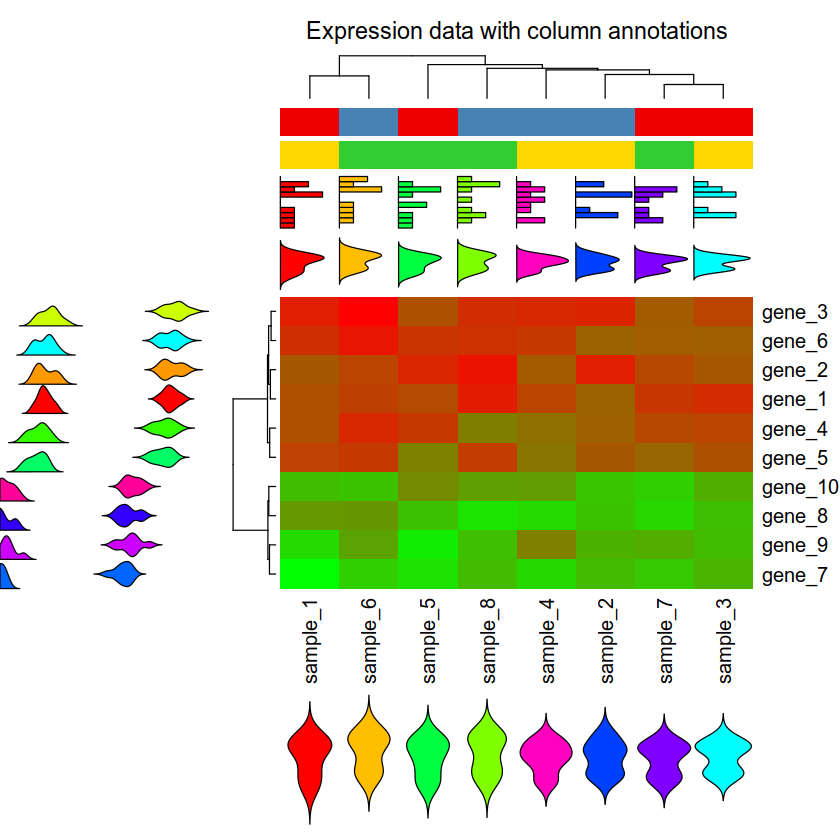

In [21]:
draw(ha_mix_right+hmap,
     heatmap_legend_side = "right",
     annotation_legend_side = "right")